In [1]:
import numpy as np 
import pandas as pd
import pathlib
import requests
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn import*
from sklearn import dummy, linear_model, feature_selection, metrics
from sklearn import model_selection, pipeline, preprocessing, impute, compose, ensemble, neighbors, svm, tree
import xgboost as xgb
from sklearn import linear_model, svm
from sklearn.model_selection import GridSearchCV


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import FeatureUnion

from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator

pd.set_option('display.max_columns', None)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        


/kaggle/input/predicting-house-prices-in-saudi-arabia/dummy_submission.csv
/kaggle/input/predicting-house-prices-in-saudi-arabia/train.csv
/kaggle/input/predicting-house-prices-in-saudi-arabia/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/predicting-house-prices-in-saudi-arabia/train.csv")

 # **Exploratory Data Analysis**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          2974 non-null   object
 1   district      2974 non-null   object
 2   front         2974 non-null   object
 3   size          2974 non-null   int64 
 4   property_age  2974 non-null   int64 
 5   bedrooms      2974 non-null   int64 
 6   bathrooms     2974 non-null   int64 
 7   livingrooms   2974 non-null   int64 
 8   kitchen       2974 non-null   int64 
 9   garage        2974 non-null   int64 
 10  driver_room   2974 non-null   int64 
 11  maid_room     2974 non-null   int64 
 12  furnished     2974 non-null   int64 
 13  ac            2974 non-null   int64 
 14  roof          2974 non-null   int64 
 15  pool          2974 non-null   int64 
 16  frontyard     2974 non-null   int64 
 17  basement      2974 non-null   int64 
 18  duplex        2974 non-null   int64 
 19  stairs

In [4]:
data.describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2.974000e+03
mean,396.326833,5.052791,5.083389,4.605245,2.251513,0.910894,0.795562,0.497646,0.794553,0.120377,0.557162,0.522529,0.160054,0.802623,0.032280,0.494956,0.813383,0.079018,0.180901,8.655742e+04
std,1746.439041,7.605978,1.227463,0.710443,0.922833,0.284944,0.403359,0.500079,0.404096,0.325456,0.496805,0.499576,0.366718,0.398086,0.176772,0.500059,0.389670,0.269812,0.385001,6.417991e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.300000e+06


In [5]:
data.columns

Index(['city', 'district', 'front', 'size', 'property_age', 'bedrooms',
       'bathrooms', 'livingrooms', 'kitchen', 'garage', 'driver_room',
       'maid_room', 'furnished', 'ac', 'roof', 'pool', 'frontyard', 'basement',
       'duplex', 'stairs', 'elevator', 'fireplace', 'price', 'details'],
      dtype='object')

In [6]:
(
    data.corr(numeric_only=True)
            .loc[:, "price"]
            .sort_values(ascending=False)
)

price           1.000000
driver_room     0.321694
ac              0.268878
pool            0.259934
basement        0.237405
maid_room       0.199865
livingrooms     0.157983
furnished       0.155373
property_age    0.150823
kitchen         0.093167
frontyard       0.087030
garage          0.083037
stairs          0.080668
elevator        0.079251
bathrooms       0.051742
size            0.046495
roof           -0.000323
fireplace      -0.056473
bedrooms       -0.062181
duplex         -0.125924
Name: price, dtype: float64

In [7]:
district_counts = data.groupby('district')['city'].nunique()

district_counts[district_counts > 1]

district
حي الامواج       2
حي الاندلس       2
حي الجوهرة       2
حي الحمراء       3
حي الخالدية      2
حي الخزامى       2
حي الربوة        2
حي الرحمانية     2
حي الروضة        2
حي الريان        2
حي الشراع        2
حي الشرق         2
حي الصفا         2
حي العقيق        2
حي العليا        2
حي الفلاح        2
حي الفيصلية      2
حي اللؤلؤ        2
حي المحمدية      2
حي المنار        2
حي المنتزه       2
حي النخيل        2
حي الندى         2
حي النزهة        2
حي النهضة        2
حي الواحة        2
حي الورود        2
حي اليرموك       2
حي بدر           2
حي طيبة          2
حي قرطبة         2
Name: city, dtype: int64

In [8]:
numerical_cols = ['size', 'property_age', 'bedrooms',
       'bathrooms', 'livingrooms', 'price']

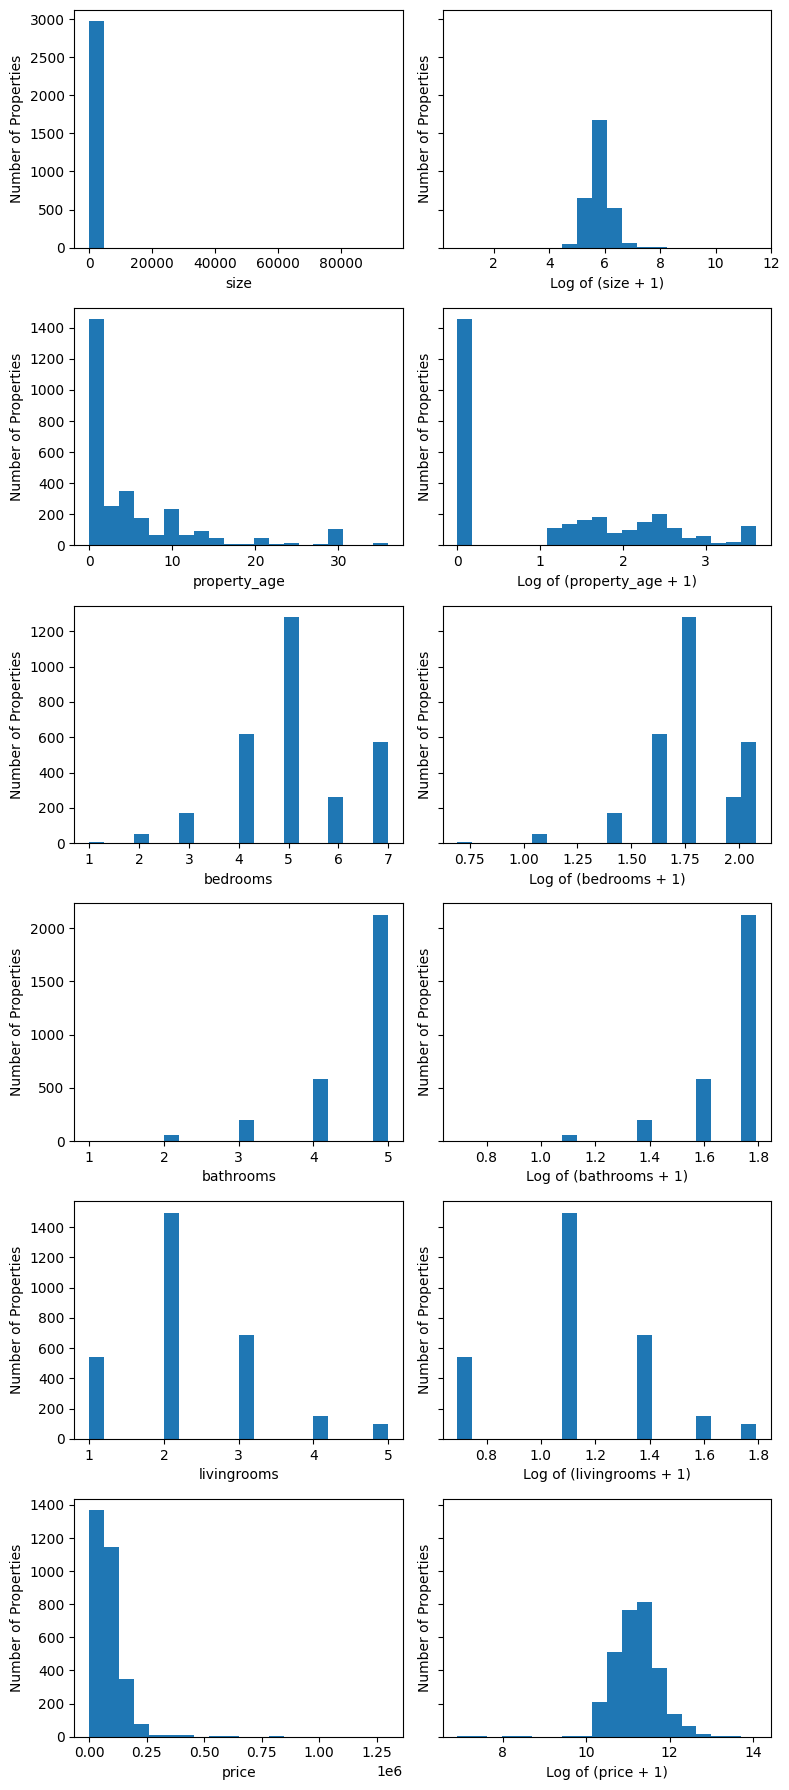

In [9]:
ig, axs = plt.subplots(6, 2, figsize=(8, 3 * 6), sharey='row')

for i, column in enumerate(numerical_cols):

    log_data = np.log(data[column] + 1)
    
    axs[i, 0].hist(data[column], bins=20)
    axs[i, 0].set_xlabel(f"{column}")
    axs[i, 0].set_ylabel("Number of Properties")

    axs[i, 1].hist(log_data, bins=20)
    axs[i, 1].set_xlabel(f"Log of ({column} + 1)")
    axs[i, 1].set_ylabel("Number of Properties")

plt.tight_layout()
plt.show()

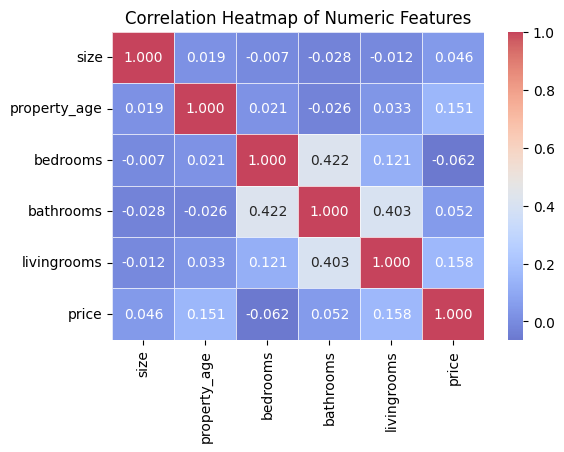

In [10]:
import seaborn as sns

correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, alpha=0.75)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

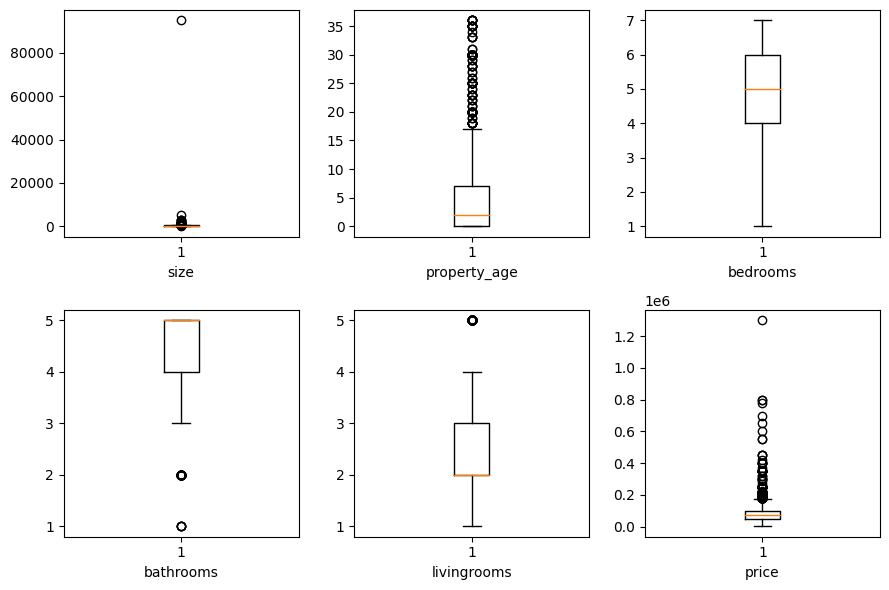

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(9, 6))

for i, column in enumerate(numerical_cols): 
    axs[i // 3, i % 3].boxplot(data[column])
    axs[i // 3, i % 3].set_xlabel(column)

plt.tight_layout()
plt.show()

In [12]:
data[data['size'] > 90000]

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
2533,جدة,حي الشاطئ,جنوب غربي,95000,0,3,3,1,1,1,1,0,0,1,0,1,1,0,1,1,0,0,95000,فلل دوبلكس جديدة للإيجار – جدة حي الشاطي كورني...


In [13]:
data[data['size'] <= 2]

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
2300,جدة,حي السلامة,جنوب,1,5,5,5,2,1,1,1,1,0,1,0,0,0,0,0,1,1,0,145000,https://my.matterport.com/show/?m=uMaLYSQ8cdM\...


In [14]:
#Dropping Outliers
data.drop(data[data['size'] > 90000].index, inplace=True)
data.drop(data[data['size'] <= 2].index, inplace=True)
# data.info()

In [15]:
#checking correlations

df = data.copy()

df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['driver_room'] + df['maid_room'] + df['livingrooms']
df['total_services'] = df['kitchen'] + df['fireplace'] + df['pool'] + df['garage'] + df['ac'] + df['roof'] + df['frontyard'] + df['basement'] + df['elevator'] + df['furnished'] + df['stairs']

        
df['rooms_per_size'] = df['total_rooms'] / df['size']    
df['services_per_size'] = df['total_services'] / df['size']
(
    df.corr(numeric_only=True)
            .loc[:, "price"]
            .sort_values(ascending=False)
)

price                1.000000
size                 0.392539
driver_room          0.321497
total_services       0.285290
ac                   0.268675
pool                 0.260241
basement             0.237505
maid_room            0.199964
livingrooms          0.158200
furnished            0.155532
property_age         0.150888
total_rooms          0.145525
kitchen              0.093074
frontyard            0.087702
garage               0.082878
stairs               0.080517
elevator             0.078384
bathrooms            0.051726
roof                 0.000044
services_per_size   -0.024541
fireplace           -0.056321
bedrooms            -0.062124
duplex              -0.125726
rooms_per_size      -0.217996
Name: price, dtype: float64

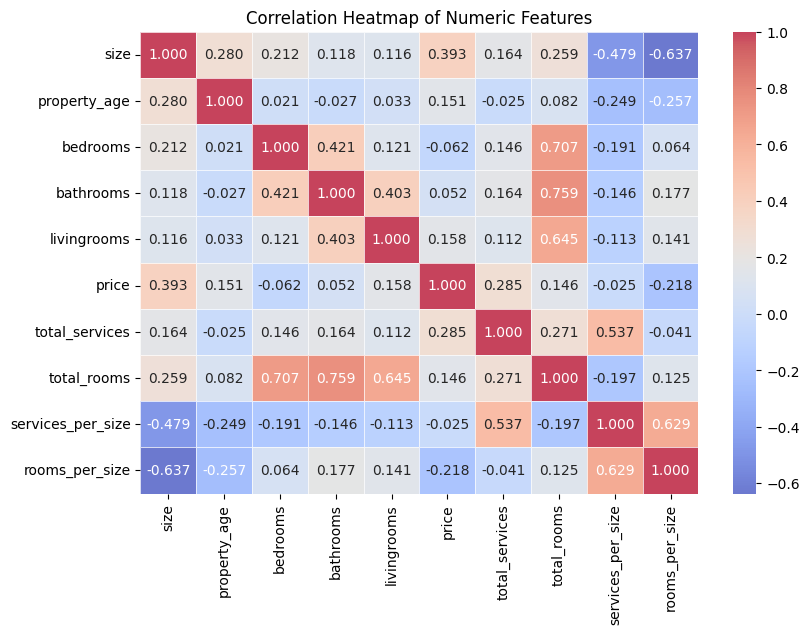

In [16]:
numerical_cols1 = ['size', 'property_age', 'bedrooms',
       'bathrooms', 'livingrooms', 'price','total_services','total_rooms','services_per_size','rooms_per_size']
correlation_matrix = df[numerical_cols1].corr()

plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, alpha=0.75)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [17]:
price_ranges = [0, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 
                120000, 140000, 160000, 180000, 200000, 220000, 240000, 300000, 
                430000, np.inf]


category_labels = ['0 to 30k', '30k to 40k', '40k to 50k', 
                   '50k to 60k', '60k to 70k', '70k to 80k', '80k to 90k', '90k to 100k', 
                   '100k to 120k', '120k to 140k', '140k to 160k', '160k to 180k', 
                   '180k to 200k', '200k to 220k', '220k to 240k', '240k to 300k', 
                   '300k to 430k', '430k to infinity']


data['price_category'] = pd.cut(data['price'], bins=price_ranges, labels=category_labels, right=False)


# **Preprocessing Pipeline**

In [18]:
features = data.drop(["price"], axis=1)
target = data.loc[:, "price"]

In [19]:
_random_state = np.random.RandomState(42)
train_features, test_features, train_target, test_target = model_selection.train_test_split(
    features,
    target,
    test_size=0.2,
    stratify=features['price_category'],
    random_state=_random_state
)

In [20]:
train_features['price_category'].value_counts()

price_category
60k to 70k          373
30k to 40k          322
80k to 90k          292
70k to 80k          202
50k to 60k          193
40k to 50k          185
140k to 160k        177
100k to 120k        164
90k to 100k         137
120k to 140k        123
160k to 180k         50
180k to 200k         48
240k to 300k         28
0 to 30k             21
220k to 240k         20
300k to 430k         18
200k to 220k         14
430k to infinity     10
Name: count, dtype: int64

In [21]:
test_features['price_category'].value_counts()

price_category
60k to 70k          93
30k to 40k          81
80k to 90k          73
70k to 80k          51
50k to 60k          48
40k to 50k          47
140k to 160k        44
100k to 120k        41
90k to 100k         35
120k to 140k        31
160k to 180k        12
180k to 200k        12
240k to 300k         7
300k to 430k         5
0 to 30k             5
220k to 240k         5
200k to 220k         3
430k to infinity     2
Name: count, dtype: int64

In [22]:
categorical_cols = ['front', "kitchen", "garage", "driver_room", "maid_room", "furnished",
                    "ac", "roof", "pool", "frontyard", "basement", "duplex",
                    "stairs", "elevator", "fireplace", 'rentdailymonthly','medprice','vhighprice', 'highprice']

numerical_cols =["property_age", "bedrooms", "bathrooms", "livingrooms", 'total_rooms', 'total_services']

log_cols = ['size']

combine_categorical_cols = ['city', 'district']

In [23]:
def column_ratio(df):
    return df.iloc[:, 0] / df.iloc[:, 1]

def column_product(df):
    return df.iloc[:, 0] * df.iloc[:, 1]

def column_combine(df):
    return df.iloc[:, 0] +'_'+ df.iloc[:, 1]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  

def product_name(function_transformer, feature_names_in):
    return ["product"]

def combine_name(function_transformer, feature_names_in):
    return ["combined"]


def make_ratio_pipeline():
    ratio_pipeline = (
        pipeline.make_pipeline(
            impute.SimpleImputer(strategy="mean"),
            preprocessing.FunctionTransformer(column_ratio, feature_names_out=ratio_name),
            preprocessing.StandardScaler(),
        ).set_output(
            transform="pandas"
        )
    )
    return ratio_pipeline

def make_product_pipeline():
    product_pipeline = (
        pipeline.make_pipeline(
            impute.SimpleImputer(strategy="mean"),
            preprocessing.FunctionTransformer(column_product, feature_names_out=product_name),
            preprocessing.StandardScaler(),
        ).set_output(
            transform="pandas"
        )
    )
    return product_pipeline




log_transform_pipeline = (
    pipeline.make_pipeline(
        impute.SimpleImputer(strategy="mean"),
        #preprocessing.StandardScaler(),
        preprocessing.FunctionTransformer(np.log1p, np.expm1, feature_names_out="one-to-one"),
    ).set_output(
        transform="pandas"
    )
)


combine_categorical_pipeline = (
    pipeline.make_pipeline(
        impute.SimpleImputer(strategy="most_frequent"),
        preprocessing.FunctionTransformer(column_combine, feature_names_out=combine_name),
        #preprocessing.OneHotEncoder(sparse_output=False, handle_unknown="ignore")
        preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    ).set_output(
        transform="pandas"
    )
)


categorical_pipeline = (
    pipeline.make_pipeline(
        impute.SimpleImputer(strategy="most_frequent"),
        #preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        preprocessing.OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    ).set_output(
        transform="pandas"
    )
)

numeric_pipeline = (
    pipeline.make_pipeline(
        impute.SimpleImputer(strategy="mean"),
        preprocessing.StandardScaler(),
    ).set_output(
        transform="pandas"
    )
)

polynomial_features_pipeline = pipeline.make_pipeline(
    preprocessing.PolynomialFeatures(degree=2, include_bias=False, interaction_only=True), 
    preprocessing.StandardScaler()       
)


In [24]:
preprocessing_pipeline = (
    compose.ColumnTransformer(
        [
            ('log', log_transform_pipeline, log_cols),
            ('numerical', numeric_pipeline, numerical_cols),
            ("categorical", categorical_pipeline, categorical_cols),
            ("combine_categorical", combine_categorical_pipeline, combine_categorical_cols),
            #("poly", polynomial_features_pipeline, numerical_cols),
        ],
        n_jobs=-1,
        remainder='drop',
    ).set_output(
        transform="pandas"
    )
)



# # **Feature Extractor Pipeline**

In [25]:
class RentPeriodExtractor(BaseEstimator, TransformerMixin):
    def init(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
                    X_copy = X.copy()
                    X_copy['rentdailymonthly'] = X_copy['details'].apply(
                        lambda x: 1 if isinstance(x, str) and ('للايجار اليومي و' in x or 'للإيجار اليومي بالسعر' in x or 'فيلا للايجار اليومي' in x or 'للتأجير اليومي' in x or 'للايجار اليومي بالسعر' in x or 'جدا للايجار اليومي' in x or 'فيلا درج داخلي للايجار الشهري' in x or 'والايجار شهري' in x or 'اتاجرت' in x or 'فيلا ايجار في الواحه' in x or 'فله لايجار درج صاله على ' in x or 'للأيجار  شهري' in x or 'شهري٤' in x or 'الإجار شهري' in x or 'شاليه كابري' in x or 'خدماتنا متميزه' in x or 'وسط الاسبوع' in x or 'شالية في' in x or 'فيلا للإيجار بحي الشاطئ' in x or 'داخلي للايجار الشهري' in x or 'الرمال الوحه' in x or 'شهري 5 الاف' in x or 'الحي التاسع' in x or '٣٢٠٠ شهري' in x)  else 0)     
                    X_copy['medprice'] = X_copy['details'].apply(
                        lambda x: 1 if isinstance(x, str) and ('قصر فاخر مفروش' in x or 'فيلا ((مودرن )) ' in x or 'حي حطين الموسي ' in x or 'فلل دبلوكس للايجار' in x or 'مبنى  اداري' in x)  else 0) 
                    X_copy['vhighprice'] = X_copy['details'].apply(
                        lambda x: 1 if isinstance(x, str) and ('تراخيص' in x or 'مكونات المشروع' in x )  else 0)
                    X_copy['highprice'] = X_copy['details'].apply(
                        lambda x: 1 if isinstance(x, str) and ('مطلوب ٨٠٠ الف' in x or '٦ فلل سكنية' in x or 'دعم الصندوق' in x or 'فيلا للاستثمار' in x or 'ممتازه السوم' in x or 'دبلوكس في الضاحيه' in x or 'دبلكسات متلاصقة' in x )  else 0)
                    return X_copy

In [26]:
class FeatureAddition(BaseEstimator, TransformerMixin):
    def init(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()

        X_copy['total_rooms'] = X_copy['bedrooms']+X_copy['bathrooms']+X_copy['driver_room']+X_copy['maid_room']+X_copy['livingrooms']
        
        X_copy['total_services'] = X_copy['kitchen']+X_copy['fireplace']+X_copy['pool']+X_copy['garage']+X_copy['ac']+X_copy['roof']+X_copy['frontyard']+X_copy['basement']+X_copy['elevator']+X_copy['furnished']+X_copy['stairs']
        
        X_copy['rooms_per_size'] = X_copy['total_rooms'] / X_copy['size']
        
        X_copy['services_per_size'] = X_copy['total_services'] / X_copy['size']

        return X_copy

In [27]:
full_pipeline = Pipeline([
    ("rent_period", RentPeriodExtractor()),
    ("feature_addition", FeatureAddition()),
    ("preprocessor", preprocessing_pipeline)
    ],)

full_pipeline

Pipeline(steps=[('rent_period', RentPeriodExtractor()),
                ('feature_addition', FeatureAddition()),
                ('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>,
                                                                                       inverse_func=<ufunc 'expm1'>))]),
                                                  ['size']),
                                                 ('nume...
                                                 ('combine_categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function combine_name at 0x7c931f0f80d0>,
                                                                                       func=<function column_combine at 0x7c931fa277f0>)),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['city', 'district'])]))])

In [28]:
prepared_features = full_pipeline.fit_transform(train_features)
prepared_features

,log__size,numerical__property_age,numerical__bedrooms,numerical__bathrooms,numerical__livingrooms,numerical__total_rooms,numerical__total_services,categorical__front_3 شوارع,categorical__front_4 شوارع,categorical__front_جنوب,categorical__front_جنوب شرقي,categorical__front_جنوب غربي,categorical__front_شرق,categorical__front_شمال,categorical__front_شمال شرقي,categorical__front_شمال غربي,categorical__front_غرب,categorical__kitchen_0,categorical__kitchen_1,categorical__garage_0,categorical__garage_1,categorical__driver_room_0,categorical__driver_room_1,categorical__maid_room_0,categorical__maid_room_1,categorical__furnished_0,categorical__furnished_1,categorical__ac_0,categorical__ac_1,categorical__roof_0,categorical__roof_1,categorical__pool_0,categorical__pool_1,categorical__frontyard_0,categorical__frontyard_1,categorical__basement_0,categorical__basement_1,categorical__duplex_0,categorical__duplex_1,categorical__stairs_0,categorical__stairs_1,categorical__elevator_0,categorical__elevator_1,categorical__fireplace_0,categorical__fireplace_1,categorical__rentdailymonthly_0,categorical__rentdailymonthly_1,categorical__medprice_0,categorical__medprice_1,categorical__vhighprice_0,categorical__vhighprice_1,categorical__highprice_0,categorical__highprice_1,combine_categorical__combined
246,6.111467,-0.665140,-0.055160,0.556327,-0.280816,-0.099208,-0.613329,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12.0
2088,5.707110,-0.665140,0.759216,-0.873282,-0.280816,-0.519558,0.019433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,17.0
983,5.746203,-0.402335,-0.055160,0.556327,0.802787,0.741493,0.652194,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,165.0
1197,5.707110,0.648888,-0.869535,0.556327,-0.280816,-0.099208,0.652194,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,178.0
1423,6.398595,0.517485,1.573592,0.556327,-0.280816,1.161844,2.550478,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,5.525453,0.911693,-0.055160,0.556327,-0.280816,0.321143,0.019433,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,51.0
35,6.111467,-0.665140,-0.055160,0.556327,-0.280816,-0.099208,-0.613329,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12.0
1476,6.470800,-0.665140,-0.055160,0.556327,1.886391,1.161844,0.652194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,187.0
2345,5.602119,-0.665140,-0.055160,0.556327,0.802787,0.741493,-0.613329,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,66.0


# # **Regressors/Target Preprocessing Pipeline**

In [29]:
bagging_regressor = ensemble.BaggingRegressor( 
    estimator=ensemble.RandomForestRegressor(),
    n_estimators=100,
    max_samples=0.6,
    bootstrap=True,
    max_features=0.6,
    bootstrap_features=False,
    oob_score=True,
    n_jobs=-1,
    random_state=42,
)

In [30]:
# pipeline = Pipeline([
#     ('preprocessing', full_pipeline),
#     ('xgb_reg', xgb.XGBRegressor())
# ])
# param_grid = {
#     'xgb_reg__n_estimators': [80, 90, 100], 
#     'xgb_reg__learning_rate': [0.01, 0.1],  
#     'xgb_reg__max_depth': [6, 7, 8], 
#     'xgb_reg__subsample': [0.3, 0.4, 0.5],  

# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
# grid_search.fit(train_features, train_target)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best neg_mean_absolute_percentage_error Score:", best_score)   

In [31]:
voting_regressor = ensemble.VotingRegressor(
    estimators=[
#         ("k_neighbors_regressor", neighbors.KNeighborsRegressor(n_jobs=-1)),
        ("xgb_reg", xgb.XGBRegressor(n_estimators = 100, max_depth=8, learning_rate=0.1, subsample=0.5, n_jobs=-1)),
#         ("RandomForest", ensemble.RandomForestRegressor(max_depth=15,min_samples_split=9,criterion="absolute_error", n_jobs=-1)),
#         ("gbr_regressor", ensemble.GradientBoostingRegressor()),
#         ("linear_svr", svm.LinearSVR()),
#         ('bagging_regressor', bagging_regressor),        


        
    ],
    weights=None,
    n_jobs=-1,
)


In [32]:
regressor_pipeline = pipeline.make_pipeline(
        full_pipeline,
        voting_regressor,
)

In [33]:
target_preprocessor = preprocessing.FunctionTransformer(
    func=np.log1p, 
    inverse_func=np.expm1,
)

In [34]:
transformed_target_pipeline = compose.TransformedTargetRegressor(
    regressor=regressor_pipeline,
    transformer=target_preprocessor
)

transformed_target_pipeline

TransformedTargetRegressor(regressor=Pipeline(steps=[('pipeline',
                                                      Pipeline(steps=[('rent_period',
                                                                       RentPeriodExtractor()),
                                                                      ('feature_addition',
                                                                       FeatureAddition()),
                                                                      ('preprocessor',
                                                                       ColumnTransformer(n_jobs=-1,
                                                                                         transformers=[('log',
                                                                                                        Pipeline(steps=[('simpleimputer',
                                                                                                                         SimpleImputer()),
                                                                                                                        ('functiontransformer',
                                                                                                                         FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                                             fun...
                                                                                                max_bin=None,
                                                                                                max_cat_threshold=None,
                                                                                                max_cat_to_onehot=None,
                                                                                                max_delta_step=None,
                                                                                                max_depth=8,
                                                                                                max_leaves=None,
                                                                                                min_child_weight=None,
                                                                                                missing=nan,
                                                                                                monotone_constraints=None,
                                                                                                multi_strategy=None,
                                                                                                n_estimators=100,
                                                                                                n_jobs=-1,
                                                                                                num_parallel_tree=None,
                                                                                                random_state=None, ...))],
                                                                      n_jobs=-1))]),
                           transformer=FunctionTransformer(func=<ufunc 'log1p'>,
                                                           inverse_func=<ufunc 'expm1'>))

# # **Evaluation**

In [35]:
prepared_features = full_pipeline.fit_transform(train_features)

In [36]:
prepared_test = full_pipeline.fit_transform(test_features)

In [37]:
_ = transformed_target_pipeline.fit(train_features, train_target)

In [38]:
averaging_regressors_score = model_selection.cross_val_score(
    transformed_target_pipeline,
    train_features,
    train_target,
    cv=5,
    n_jobs=-1,
    scoring="neg_mean_absolute_percentage_error"
)

np.mean(-averaging_regressors_score)

0.12780778623189987

In [39]:
train_predictions = transformed_target_pipeline.predict(train_features)


metrics.mean_absolute_percentage_error(
    train_target,
    train_predictions
)

0.048749862087296585

In [40]:
test_predictions = transformed_target_pipeline.predict(test_features)


metrics.mean_absolute_percentage_error(
    test_target,
    test_predictions
)

0.1263175232414117

# # **Submission**

In [41]:
submission_features = pd.read_csv("/kaggle/input/predicting-house-prices-in-saudi-arabia/test.csv")

In [42]:
submission_predictions = transformed_target_pipeline.predict(submission_features)
(
    pd.read_csv("/kaggle/input/predicting-house-prices-in-saudi-arabia/dummy_submission.csv")
      .assign(price=submission_predictions)
      .to_csv("submission.csv", index=False)
)

In [43]:
%%bash
cat submission.csv | head -n 5

id,price
0,120181.98
1,40553.387
2,79646.734
3,84350.08
